In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#fn for drawing lines
def draw(x1,x2):
    line = plt.plot(x1,x2)

def sigmoid(score):
    return 1/(1+ np.exp(-score))

#calculate_error(line_parameters,all_points,y) y is labels
# to calculate the cross entropy equation (error) we need log of probabilities of each point 
# multiply it with label(y)
def calculate_error(line_parameters,points,y):
    
    m = points.shape[0] # to get numer of points
    probabilities = sigmoid(points*line_parameters)
    #(one row probs *one column label to get 1x1 matrix) dont forget to tak the average of the log summation
    cross_entropy = -(1/m)*(np.log(probabilities).T*y + np.log(1-probabilities).T*(1-y))
    return cross_entropy




def gradient_descent(line_parameters, points, y, alpha):  #alpha- learning rate variable
   #we have 500 chances to find the line with the least error using formula
    m = points.shape[0] # to get numer of iterations of points i.e. no of rows.

    for i in range(500):
        p = sigmoid(points*line_parameters)

        gradient = (points.T*(p-y))*(alpha/m) #points is a 20x3 array  and p-y 20x1 arrays so to multiply we need to transpose the points array 
        # Update the line parameters by subtracting the gradient from it in small steps( *learnig rate)
        line_parameters = line_parameters - gradient
        
        # line_parameters = np.matrix([w1,w2,b]).T

        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)

        x1 = np.array([points[:,0].min(),points[:,0].max()]) # horizontal co-ordinates of the points to the left and right extremes
        x2 = -b/w2 - x1*(w1/w2)
        
    draw(x1,x2)

In [ ]:

 
n_pts=101
np.random.seed(0) # so that we get the same random poits every time

#bias
bias = np.ones(n_pts)

# randomly creating x1 and x2  points via normal distribbutions for upper right and bottom left
top_region = np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts),bias]).T 
bottom_region = np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts),bias]).T

all_points = np.vstack((top_region,bottom_region)) #to print all our points together

#create a matrix of parameters for the line to be plotted for starting classification w1x1 +w2x2 + b = 0

# These parameters have to be decided by the computer itself 
# w1 = -0.2
# w2 = -0.35
# b = 3.5

#take transpose so that if we do the multiplication of all points and parameters.
#The points are x1,x2 and line params are w1,w2 and b initial b is 1 after multiplication itll be 1*3.5

# line_parameters = np.matrix([w1,w2,b]).T

line_parameters = np.matrix([np.zeros(3)]).T

print(all_points.shape)
print(line_parameters.shape)

# we want to cover from the further most point on left bottom to the furthermost point on right top
# x1 = np.array([bottom_region[:,0].min(),top_region[:,0].max()]) # horizontal co-ordinates of the points to the left and right extremes
# x2 = -b/w2 - x1*(w1/w2)
# ^^ this has to be decided by the computer


print(x1,x2)

#now to get line equations via x1w1 +x2w2 + b we need to multiplythe line params(w1,w2,b) with all points(x1,x2)

linear_combination = all_points*line_parameters
# linear_combination # check 10 elements


# now that we have the linear combination of the points(line equations) in an array
# we need to convert the linear combinations to probabtilities using sigmoid fn

#higher the probability the closer it is to the left bottom and conversely top right
# probabilities = sigmoid(linear_combination) used in the calculate error function


# How will the computer know which model correctly classifies the data?
#There are problems with misclassified data so to solve this problem we need cross entropy(sum of logs)
#step 1 calculate probablities
#prob(red) = 1-Prob(blue)
#if we add the log of probabilities after classification and they add up to be high the error is high hence bad model
# calculate CE and decide which model to use CE more Error more

# To decide which points are labelled 1 and which are zero we know that the bottom left points were stacked
# on the top left points so the first half of that array is to be labelled 1 and econd half as 0
y = np.array([np.zeros(n_pts),np.ones(n_pts)]).reshape(n_pts*2,1) # reshape(rows,cols)to make 20 rows of ones and zeroes


calculate_error(line_parameters,all_points,y)

#after we have found out the error wewill use gradient descent so that it will constantly reduce the error
# keep doing this till we get the best model. to minimize error
#1.take derivative of the error (w1, w2, b)wrt weights to get gradients and subtract it from error 
 
 #    gradient of error = pts*(p-y)/m
 #    pts = points
 #    p = probability
 #    y = label
 #    m = number of points(no of rows)
    
# to be more specific the prediction for a single point is subtracted from the points actuual label 
# then the result is muliplied by the points co-ordinates which is done for every single points and t
# taking the summationo each result the  dividing by the no of points


### Subtracting the error fro the previos error gives us nex weights and lines with small error fuunctions.
### NOTE: we need to take small leaps from one point to the other by multiplying with small value known as learning rates


(202, 3)
(3, 1)
[-0.10597963 14.4817864 ] [10.06055979  1.72469349]


matrix([[0.69314718]])

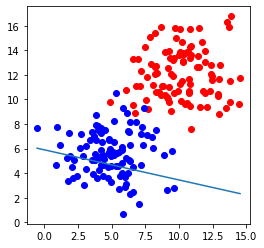

In [ ]:

_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
# draw(x1,x2) - this has to be decided by computer


gradient_descent(line_parameters, all_points, y, 0.01)

plt.show()